In [11]:
import torch
import torch.nn as nn
from attention_pytorch import LSTMWithAttention, focal_loss
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
import numpy as np
import aiutils.ai_backtester as bt

In [1]:
from preprocess import *

aiutils-0.58/aiutils/features_manager.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
aiutils-0.58/aiutils/features_manager.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
aiutils-0.58/aiutils/features_manager.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c

                        bars     days   weeks  months  years
Before Date Filtering  73863  4281.38  611.62  138.11  11.73
After Date Filtering   73863  4281.38  611.62  138.11  11.73
Percentage : 100.0%

Data Shapes (train,val,test,datetime)
(51693, 16, 12) (11077, 16, 12) (11078, 16, 12) (73848,)
2010-01-07T15:00:00.000000000 2021-09-27T09:00:00.000000000
After Time Filtering
(10652, 16, 12) (2270, 16, 12) (2270, 16, 12) (15192,)
2010-01-07T15:00:00.000000000 2021-09-24T16:00:00.000000000
val start : 2018-03-27T12:00:00.000000000
test start : 2019-12-26T12:00:00.000000000
                       bars    days  weeks  months  years
Before Date Filtering  8208  470.54  67.22   15.18   1.29
After Date Filtering   8208  470.54  67.22   15.18   1.29
Percentage : 100.0%

Data Shapes (train,val,test,datetime)
(8193, 16, 12) (0, 16, 12) (0, 16, 12) (8193,)
2021-09-28T01:00:00.000000000 2023-01-10T23:00:00.000000000
After Time Filtering
(1680, 16, 12) (0, 16, 12) (0, 16, 12) (1680,)
2021-09-28T1

# Creation des jeux de données

In [3]:
def get_data_loaders(X_train, y_train, X_val, y_val, batch_size=64):

    #convertion au format pytorch des données fourines par la fonction préprocess LUSIS, initialement au format numpy

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

   
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader
train_loader, val_loader = get_data_loaders(X_train, y_train, X_val, y_val)

# Création du modèle

In [4]:
### hyperparamètres à choisir ici ###
lr = 0.000116906
momentum = 0.9
alpha = 0.20314
gamma = 2.29552
h1 = 6
h2 = 12
h3 = 32

In [9]:
lytrain = len(y_train)
lyval = len(y_val)

######## création du modèle ########

model = LSTMWithAttention(len(features),h1, h2, h3, softmax = True)
optimizer = torch.optim.SGD(
        model.parameters(),
        lr=lr,
        momentum=momentum
    )
criterion = focal_loss(alpha=alpha, gamma=gamma,num_classes=2)

######## boucle d'entrainement ########

model.train()

for epoch in tqdm(range(50)):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.float()
        outputs = model(inputs)
        loss = criterion(labels, outputs)
        loss.backward()
        optimizer.step()

100%|██████████| 50/50 [30:37<00:00, 36.74s/it]


# Backtest

In [13]:
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
X_bck_tensor = torch.tensor(X_bck, dtype=torch.float32)
y_bck_tensor = torch.tensor(y_bck, dtype=torch.float32)

### EURUSD Model V1 Strategy

CY

_2024-04-26 18:21:48_

#### Setup

,
symbol,EURUSD
timescale,Hourly
spread,0.00000
starting equity,"10,000"
from,2018-03-27 12:00:00
to,2021-09-24 16:00:00


---

#### Performance Report

,All,Long,Short
Net P&L,"3,527.10",-328.00,"3,855.10"
Gross Profit,"51,032.30","13,691.30","37,341.00"
Gross Loss,"-47,505.20","-14,019.30","-33,485.90"
Profit Factor,1.07,0.98,1.12
Total # of Trades,"4,540.00","1,305.00","3,235.00"
Number Winning Trades,"2,311.00",635.00,"1,676.00"
Number Losing Trades,"2,229.00",670.00,"1,559.00"
Percent Profitable,0.51,0.49,0.52
Avg Trade Win Loss,0.78,-0.25,1.19
Avg Winning Trade,22.08,21.56,22.28


#### Performance/Risk Metrics

,,
slope,-0.0458,
r2,0.0037,
stderr,0.0111,
quality ratio,-0.0154,
Max Drawdown,3362.3,2020-08-07 00:00:00
Max Drawdown %,23.0 %,2020-08-07 00:00:00


#### Returns Metrics

,
Cumulative returns,0.3527
Annual return,0.0869
Average monthly return,0.0077
Return Max Drawdown,-0.2317
MDD Recovery Period,254.0000
Longest Drawdown Period,693.0000
Mean daily loss,-0.0065
Worst daily loss,-0.0457
99% quantile daily loss,-0.0297
Worst monthly loss,-0.0732


#### Risk Adjusted Metrics

,
Sharpe,0.5676
Sortino,0.8486
Omega,1.1164
Calmar,0.3748


#### Equity Curve

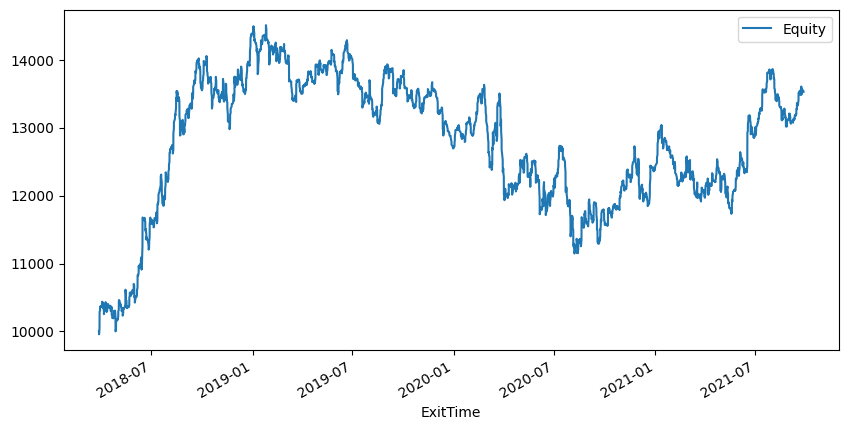

#### P&L Statistics

,Daily PL,Weekly PL,Monthly PL
count,910.00,183.00,43.00
mean,3.88,19.27,82.03
std,110.92,271.48,454.78
min,-613.60,"-1,012.90",-896.70
25%,-53.85,-164.95,-173.15
50%,0.15,5.70,65.80
75%,64.30,201.40,315.55
max,611.90,797.70,"1,132.40"


#### Monthly Returns

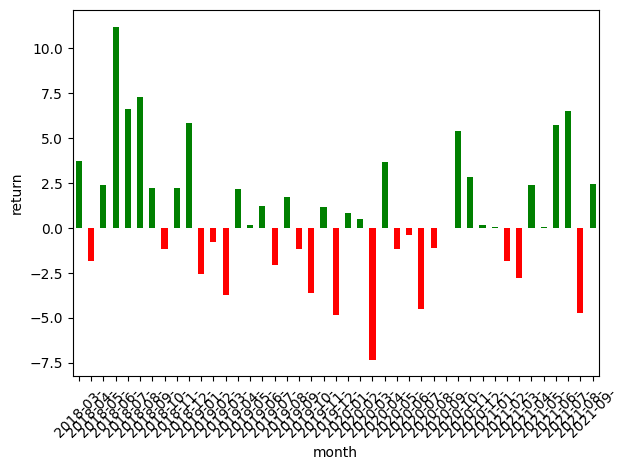

#### MAE/MFE

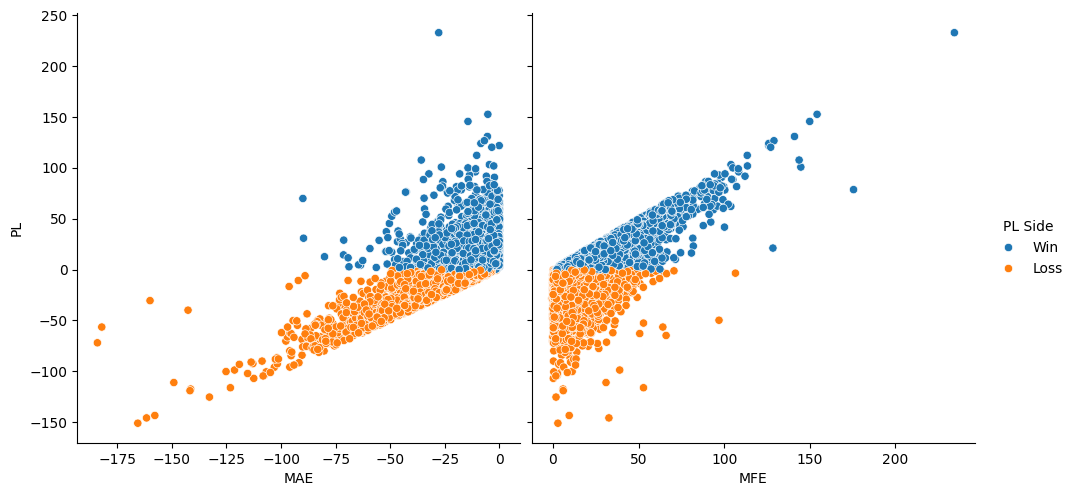

#### Trades

,Side,EntryPrice,EntryTime,ExitPrice,ExitTime,PointPL,TradeSize,PL,CumPL,Equity,Return,CumReturn,PLSign,MAE,MFE
date,,,,,,,,,,,,,,,
2018-03-27 12:00:00,SELL,1.24064,2018-03-27 12:00:00,1.23996,2018-03-27 20:00:00,0.00068,"10,000",6.8,6.8,10006.8,0.000680,0.00068,1,-9.0,34.8
2018-03-27 13:00:00,SELL,1.23906,2018-03-27 13:00:00,1.23959,2018-03-27 21:00:00,-0.00053,"10,000",-5.3,1.5,10001.5,-0.000530,0.00015,-1,-24.8,19.0
2018-03-27 14:00:00,SELL,1.23864,2018-03-27 14:00:00,1.24016,2018-03-27 22:00:00,-0.00152,"10,000",-15.2,-13.7,9986.3,-0.001520,-0.00137,-1,-29.0,9.5
2018-03-27 15:00:00,SELL,1.23900,2018-03-27 15:00:00,1.24054,2018-03-27 23:00:00,-0.00154,"10,000",-15.4,-29.1,9970.9,-0.001542,-0.00291,-1,-25.4,1.2
2018-03-27 16:00:00,SELL,1.23928,2018-03-27 16:00:00,1.24056,2018-03-28 00:00:00,-0.00128,"10,000",-12.8,-41.9,9958.1,-0.001284,-0.00419,-1,-22.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24 12:00:00,SELL,1.17339,2021-09-24 12:00:00,1.17154,2021-09-24 20:00:00,0.00185,"10,000",18.5,3561.8,13561.8,0.001366,0.35618,1,-2.4,33.8
2021-09-24 13:00:00,SELL,1.17131,2021-09-24 13:00:00,1.17157,2021-09-24 21:00:00,-0.00026,"10,000",-2.6,3559.2,13559.2,-0.000192,0.35592,-1,-11.7,13.0
2021-09-24 14:00:00,SELL,1.17061,2021-09-24 14:00:00,1.17198,2021-09-24 22:00:00,-0.00137,"10,000",-13.7,3545.5,13545.5,-0.001010,0.35455,-1,-18.7,6.0


### EURUSD Model V1 Strategy

CY

_2024-04-26 18:21:57_

#### Setup

,
symbol,EURUSD
timescale,Hourly
spread,0.00000
starting equity,"10,000"
from,2021-09-28 12:00:00
to,2023-01-10 16:00:00


---

#### Performance Report

,All,Long,Short
Net P&L,"4,011.20","1,232.70","2,778.50"
Gross Profit,"26,538.70","9,072.80","17,465.90"
Gross Loss,"-22,527.50","-7,840.10","-14,687.40"
Profit Factor,1.18,1.16,1.19
Total # of Trades,"1,680.00",547.00,"1,133.00"
Number Winning Trades,896.00,271.00,625.00
Number Losing Trades,784.00,276.00,508.00
Percent Profitable,0.53,0.50,0.55
Avg Trade Win Loss,2.39,2.25,2.45
Avg Winning Trade,29.62,33.48,27.95


#### Performance/Risk Metrics

,,
slope,1.8440,
r2,0.7655,
stderr,0.0249,
quality ratio,56.6473,
Max Drawdown,1642.0,2022-08-18 00:00:00
Max Drawdown %,13.0 %,2022-08-18 00:00:00


#### Returns Metrics

,
Cumulative returns,0.4011
Annual return,0.2878
Average monthly return,0.0210
Return Max Drawdown,-0.1253
MDD Recovery Period,47.0000
Longest Drawdown Period,118.0000
Mean daily loss,-0.0087
Worst daily loss,-0.0497
99% quantile daily loss,-0.0368
Worst monthly loss,-0.0576


#### Risk Adjusted Metrics

,
Sharpe,1.4107
Sortino,2.1951
Omega,1.2659
Calmar,2.2978


#### Equity Curve

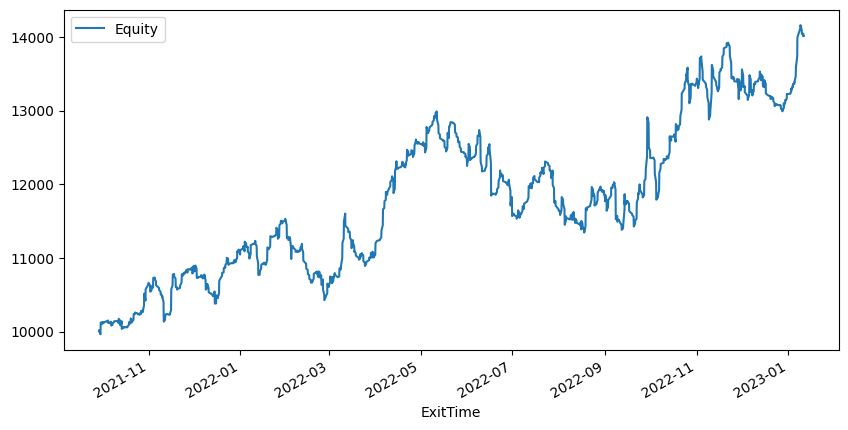

#### P&L Statistics

,Daily PL,Weekly PL,Monthly PL
count,336.00,68.00,17.00
mean,11.94,58.99,235.95
std,147.04,320.13,548.28
min,-598.30,-606.20,-678.90
25%,-61.60,-140.10,0.10
50%,10.25,71.40,199.30
75%,84.38,238.35,533.90
max,648.30,934.10,"1,396.50"


#### Monthly Returns

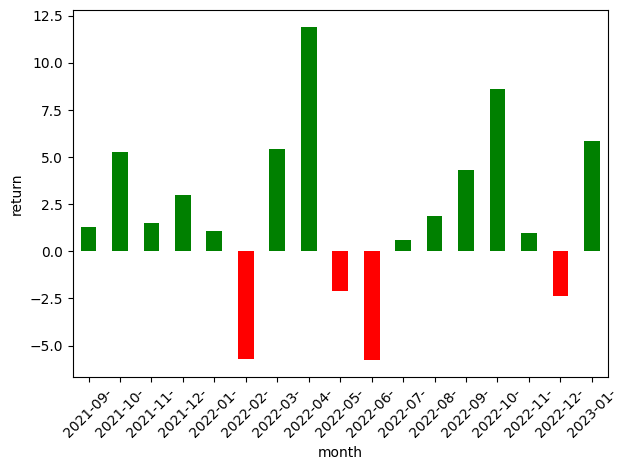

#### MAE/MFE

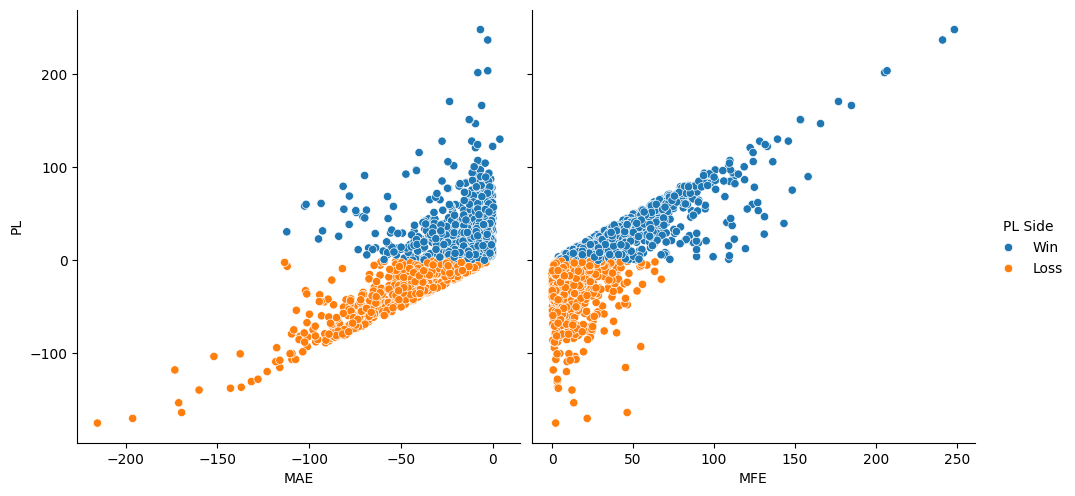

#### Trades

,Side,EntryPrice,EntryTime,ExitPrice,ExitTime,PointPL,TradeSize,PL,CumPL,Equity,Return,CumReturn,PLSign,MAE,MFE
date,,,,,,,,,,,,,,,
2021-09-28 12:00:00,SELL,1.16811,2021-09-28 12:00:00,1.16765,2021-09-28 20:00:00,0.00046,"10,000",4.6,4.6,10004.6,0.000460,0.00046,1,-19.5,13.6
2021-09-28 13:00:00,SELL,1.16867,2021-09-28 13:00:00,1.16847,2021-09-28 21:00:00,0.00020,"10,000",2.0,6.6,10006.6,0.000200,0.00066,1,-13.9,19.2
2021-09-28 14:00:00,BUY,1.16799,2021-09-28 14:00:00,1.16827,2021-09-28 22:00:00,0.00028,"10,000",2.8,9.4,10009.4,0.000280,0.00094,1,-12.4,20.7
2021-09-28 15:00:00,BUY,1.16804,2021-09-28 15:00:00,1.16821,2021-09-28 23:00:00,0.00017,"10,000",1.7,11.1,10011.1,0.000170,0.00111,1,-12.9,20.2
2021-09-28 16:00:00,BUY,1.16732,2021-09-28 16:00:00,1.16845,2021-09-29 00:00:00,0.00113,"10,000",11.3,22.4,10022.4,0.001129,0.00224,1,-5.7,16.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10 12:00:00,SELL,1.07351,2023-01-10 12:00:00,1.07408,2023-01-10 20:00:00,-0.00057,"10,000",-5.7,4043.5,14043.5,-0.000406,0.40435,-1,-24.3,23.2
2023-01-10 13:00:00,SELL,1.07194,2023-01-10 13:00:00,1.07359,2023-01-10 21:00:00,-0.00165,"10,000",-16.5,4027.0,14027.0,-0.001175,0.40270,-1,-40.0,7.5
2023-01-10 14:00:00,SELL,1.07218,2023-01-10 14:00:00,1.07329,2023-01-10 22:00:00,-0.00111,"10,000",-11.1,4015.9,14015.9,-0.000791,0.40159,-1,-37.6,0.2


In [20]:
## Backtest on val + test set
val_test_report = bt.classifier_backtest(df,                               
                        np.concatenate([model(X_val_tensor).detach().numpy() ,model(X_test_tensor).detach().numpy()]),
                        y_datetime[X_train.shape[0]:],
                        predict_bars=horizon,
                        bh = False,
                        qty=10000,
                        spread = 0.0000,
                        starting_equity=10000,
                        symbol=pair,
                        side='both',
                        name='{} Model V1'.format(pair),
                        author='CY',
                        note=None,
                        showequitycurve=True,
                        showtrades=True,
                        showplstats=True,
                        showmaemfe=True)


## Backtest on backtest set
BT_report = bt.classifier_backtest(df,                               
                        model(X_bck_tensor).detach().numpy(),
                        y_bck_datetime,
                        predict_bars=horizon,
                        bh = False,
                        qty=10000,
                        spread = 0.0000,
                        starting_equity=10000,
                        symbol=pair,
                        side='both',
                        name='{} Model V1'.format(pair),
                        author='CY',
                        note=None,
                        showequitycurve=True,
                        showtrades=True,
                        showplstats=True,
                        showmaemfe=True)